# This Script contains the following:
### 1. Importing of Libraries
### 2. Cleaning of Data
### 3. The Elbow Technique
### 4. K-means Algorithm
### 5. Calculate Descriptive Statistics - groupby()

### 1. Importing of Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# define path
path =r"C:\Users\repla\Documents"

In [3]:
#Importing Data Set
df = pd.read_csv(r"C:\Users\repla\Documents\Exercise 6\2 - Data\Prepared Data\gun_violence_data_cleaned2.csv", index_col = False)

In [4]:
df.head()

,Unnamed: 0,incident_id,date,state,n_participants,n_killed,n_injured,victims,suspects,adult,teen,child,killed,injured,arrested,unharmed
0,0,461105,2013-01-01,Pennsylvania,5,0,4,4,1,True,False,False,False,True,True,False
1,1,460726,2013-01-01,California,5,1,3,4,1,True,False,False,True,True,False,False
2,2,478855,2013-01-01,Ohio,5,1,3,3,2,True,False,False,True,True,True,True
3,3,478925,2013-01-05,Colorado,4,4,0,3,1,True,False,False,True,False,False,False
4,4,478959,2013-01-07,North Carolina,4,2,2,3,1,True,True,False,True,True,False,False


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186929 entries, 0 to 186928
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      186929 non-null  int64 
 1   incident_id     186929 non-null  int64 
 2   date            186929 non-null  object
 3   state           186929 non-null  object
 4   n_participants  186929 non-null  int64 
 5   n_killed        186929 non-null  int64 
 6   n_injured       186929 non-null  int64 
 7   victims         186929 non-null  int64 
 8   suspects        186929 non-null  int64 
 9   adult           186929 non-null  bool  
 10  teen            186929 non-null  bool  
 11  child           186929 non-null  bool  
 12  killed          186929 non-null  bool  
 13  injured         186929 non-null  bool  
 14  arrested        186929 non-null  bool  
 15  unharmed        186929 non-null  bool  
dtypes: bool(7), int64(7), object(2)
memory usage: 14.1+ MB


In [7]:
df.shape

(186929, 16)

### 2. Cleaning of Data

In [8]:
# Removing more columns
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [9]:
#we'll remove the outliers from our dataset
# Calculate the first and third quartiles
Q1 = df['n_participants'].quantile(0.25)
Q3 = df['n_participants'].quantile(0.75)

In [10]:
# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

In [11]:
# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [12]:
# Filter the dataset to remove outliers
df = df[(df['n_participants'] >= lower_bound) & (df['n_participants'] <= upper_bound)]

In [13]:
# View the frequency of each value in the 'n_participants' column
print(df['n_participants'].value_counts())

n_participants
1    90291
2    62038
3    20609
Name: count, dtype: int64


In [14]:
df.shape

(172938, 15)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 172938 entries, 60 to 186928
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   incident_id     172938 non-null  int64 
 1   date            172938 non-null  object
 2   state           172938 non-null  object
 3   n_participants  172938 non-null  int64 
 4   n_killed        172938 non-null  int64 
 5   n_injured       172938 non-null  int64 
 6   victims         172938 non-null  int64 
 7   suspects        172938 non-null  int64 
 8   adult           172938 non-null  bool  
 9   teen            172938 non-null  bool  
 10  child           172938 non-null  bool  
 11  killed          172938 non-null  bool  
 12  injured         172938 non-null  bool  
 13  arrested        172938 non-null  bool  
 14  unharmed        172938 non-null  bool  
dtypes: bool(7), int64(6), object(2)
memory usage: 13.0+ MB


In [15]:
#We removed roughly 13991 values from the dataset. That represented only about 8% of our entire data.

### 3. The Elbow Technique

In [16]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [19]:
# Exclude the 'date' column from the DataFrame before applying KMeans
df_numeric = df.drop('date', axis=1)

In [21]:
# Exclude the specified columns from the DataFrame before applying KMeans
columns_to_exclude = ['incident_id', 'state', 'adult', 'teen', 'child', 'killed', 'injured', 'arrested', 'unharmed', 'date']
df_numeric = df.drop(columns_to_exclude, axis=1)

In [22]:
# Apply KMeans to the numeric DataFrame
score = [kmeans[i].fit(df_numeric).score(df_numeric) for i in range(len(kmeans))]

C:\Users\repla\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\repla\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\repla\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\repla\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

In [23]:
score

[-335916.41953763005,
 -231195.50902703987,
 -166967.26233695145,
 -131126.13452909552,
 -102639.447382146,
 -79255.42706108936,
 -62677.32994555817,
 -49723.95469682936,
 -42466.062143624215]

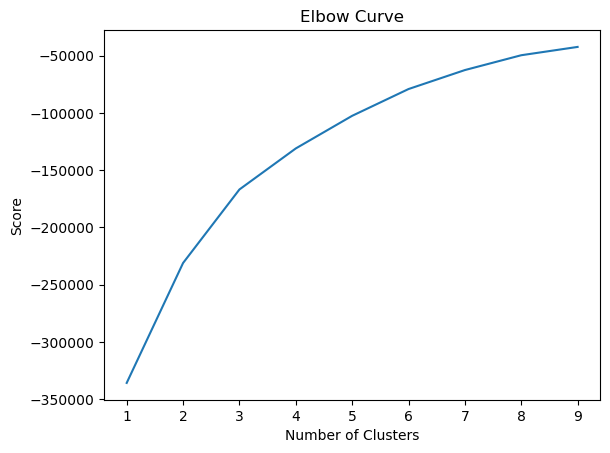

In [24]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [25]:
## NOTES
# It appears that 3 is our sharpest elbow. I will choose 3 as my cluster # to apply to my algorithm

### 4. K-means Algorithm

In [26]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [28]:
# Fit the k-means object to the data.

kmeans.fit(df_numeric)

C:\Users\repla\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [30]:
df_numeric['clusters'] = kmeans.fit_predict(df_numeric)

C:\Users\repla\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [31]:
df_numeric.head()

,n_participants,n_killed,n_injured,victims,suspects,clusters
60,2,1,0,1,1,0
72,2,0,2,1,1,0
75,3,1,0,1,2,0
115,1,0,1,0,1,1
117,2,1,0,1,1,0


In [32]:
df_numeric['clusters'].value_counts()

clusters
0    67934
2    58894
1    46110
Name: count, dtype: int64

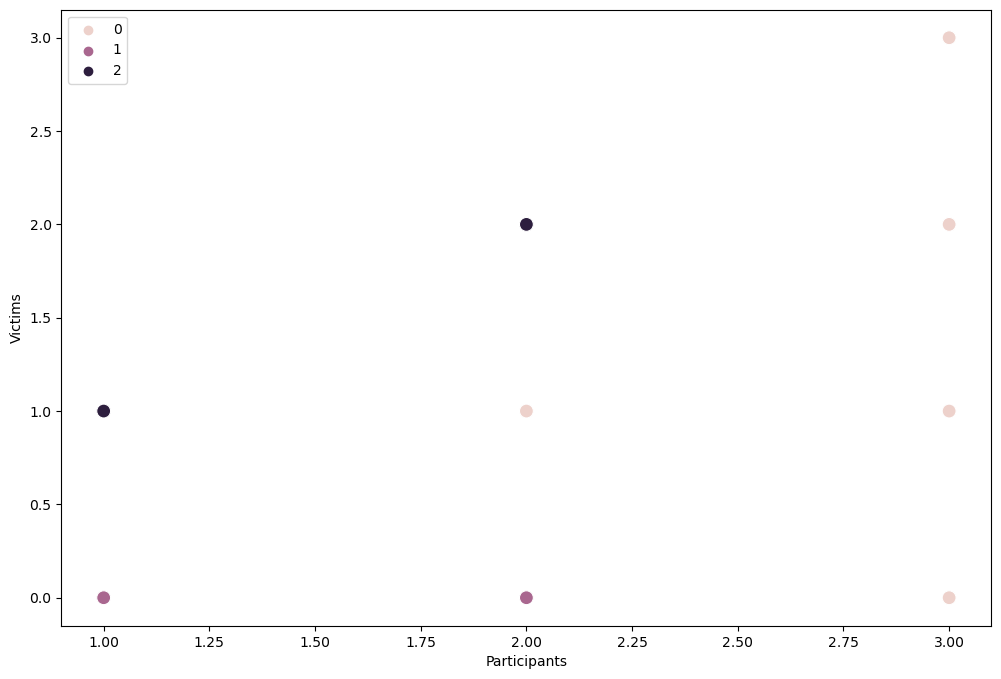

In [35]:
# Plot the clusters for the "n_participants" and "Victims" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numeric['n_participants'], y=df_numeric['victims'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Participants') # Label x-axis.
plt.ylabel('Victims') # Label y-axis.
plt.show()

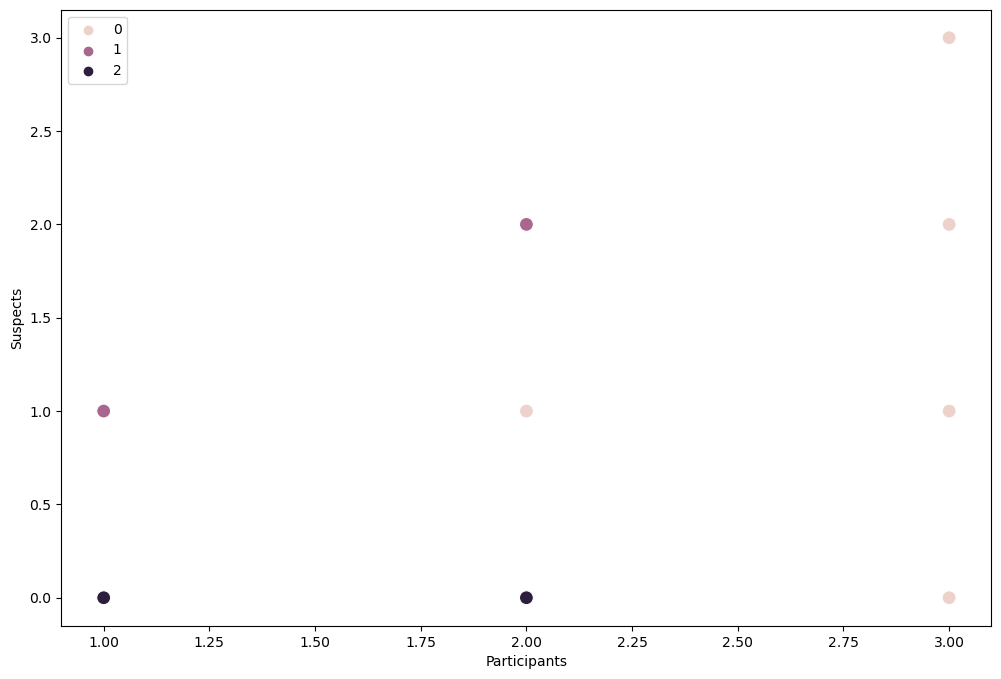

In [36]:
# Plot the clusters for the "n_participants" and "Suspects" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numeric['n_participants'], y=df_numeric['suspects'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Participants') # Label x-axis.
plt.ylabel('Suspects') # Label y-axis.
plt.show()

In [37]:
## NOTES
# I believe the cleaning of my data to remove the outlier variables has not helped me. I have so few variable options now, the scatterplots have limited options and produce these weak charts.

### 5. Calculate Descriptive Statistics - groupby()

In [40]:
df_numeric.loc[df_numeric['clusters'] == 2, 'cluster'] = 'dark purple'
df_numeric.loc[df_numeric['clusters'] == 1, 'cluster'] = 'purple'
df_numeric.loc[df_numeric['clusters'] == 0, 'cluster'] = 'pink'

In [41]:
df_numeric.groupby('cluster').agg({'n_participants':['mean', 'median'], 
                         'victims':['mean', 'median'], 
                         'suspects':['mean', 'median']})

n_participants          victims         suspects       
                      mean median      mean median      mean median
cluster                                                            
dark purple       1.130777    1.0  1.130777    1.0  0.000000    0.0
pink              2.303368    2.0  1.101996    1.0  1.201372    1.0
purple            1.152049    1.0  0.000000    0.0  1.152049    1.0

In [42]:
## NOTES
# I do not see this new information aiding us in the future. We were already aware of their close correlation, as this highlights.